# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import os

# Habits of Web Users?

1. Track users history by ip address
2. 

# Data Clean / Prep

#### Prepare Data

In [2]:
# Read CSV
df = pd.read_csv('weblog.csv')
# Remove bracket from time
df['Time']= df['Time'].map(lambda x: x.lstrip('['))
# Split date and time
df[['date','time']]= df['Time'].str.split(':',n = 1, expand = True)
# Drop origional Time column
df.drop(columns=['Time'], inplace = True)
# Replace / with - in date
df['date'] = df['date'].str.replace('/', '-')
# Use properly formatted time to coerce datetime
df['date_time'] = pd.to_datetime(df['date'], errors='coerce')
# Drop origional date and time columns
df.drop(columns=['date'], inplace = True)
#df.drop(columns=['time'], inplace = True)

# Rename columns to make them easier to work with
df.rename(columns = {'IP':'ip','URL':'url','Staus':'status'},inplace = True)
# Create a new column for action GET/PUSH
df[['method','url']]= df['url'].str.split('/',n = 1, expand = True)
# create new column for transfer protocol
df[['url','transfer_protocol']]= df['url'].str.split(' ',n = 1, expand = True)
# Turn df variables in to categories
df = df.astype('string')


# Remove nonsense values from ip column (df)
indexNames = df[(df['ip'] == '[Mon')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Tue')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Wed')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Thu')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Fri')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Sat')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'chmod:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'rm:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'timeout:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'sh:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'a.out:')].index
df.drop(indexNames , inplace=True)

# Add datetime columns, set as index
df['year'] = pd.DatetimeIndex(df['date_time']).year
df['month'] = pd.DatetimeIndex(df['date_time']).month
df['day'] = pd.DatetimeIndex(df['date_time']).day
df = df.set_index('date_time').sort_index()

df.head()

,ip,url,status,time,method,transfer_protocol,year,month,day
date_time,,,,,,,,,
2017-11-07,10.130.2.1,,200,23:59:19,GET,HTTP/1.1,2017,11,7
2017-11-07,10.130.2.1,,200,23:59:19,GET,HTTP/1.1,2017,11,7
2017-11-08,10.128.2.1,,302,01:36:22,GET,HTTP/1.1,2017,11,8
2017-11-08,10.131.2.1,login.php,200,15:56:29,GET,HTTP/1.1,2017,11,8
2017-11-08,10.130.2.1,,302,15:56:23,GET,HTTP/1.1,2017,11,8


In [3]:
df.isna().sum()

ip                   0
url                  0
status               0
time                 0
method               0
transfer_protocol    0
year                 0
month                0
day                  0
dtype: int64

In [4]:
#df.index.value_counts()

#### Explore IP addresses

In [5]:
# 10.128.2.1 
user_10_128 = df['ip'] == '10.128.2.1'
user_10_128 = df[user_10_128]

#10.131.0.1
user_10_131 = df['ip'] == '10.131.0.1'
user_10_131 = df[user_10_131]

#10.130.2.1
user_10_130 = df['ip'] == '10.130.2.1'
user_10_130 = df[user_10_130]

#10.129.2.1
user_10_129 = df['ip'] == '10.129.2.1'
user_10_129 = df[user_10_129]

#10.131.2.1
user_10_1312 = df['ip'] == '10.131.2.1'
user_10_1312 = df[user_10_1312]


#### What types of HTTP Status were observed?

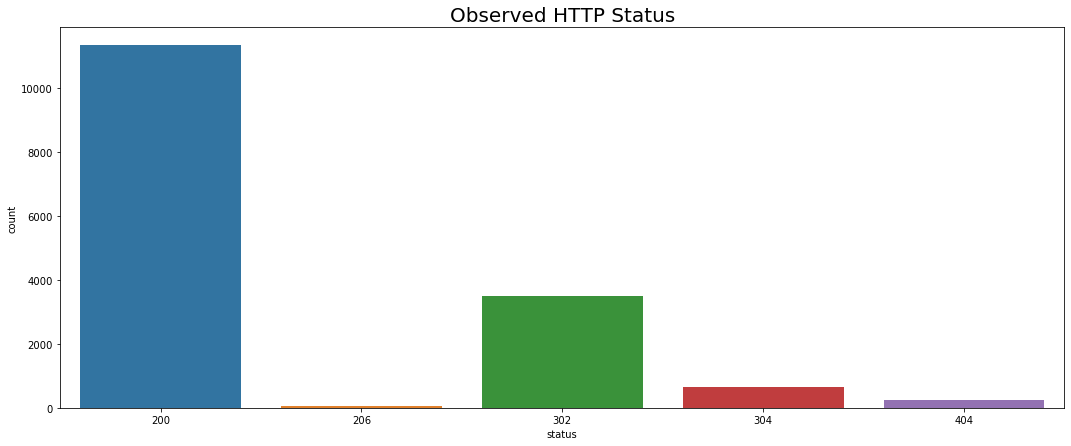

In [6]:
plt.rcParams['figure.figsize'] = (18, 7)
order = ['200','206','302','304','404']
sns.countplot(data=df, 
            x='status', 
            order = order)
plt.title('Observed HTTP Status', fontsize = 20)
plt.show()

`200 Status:`  The request has succeeded. The information returned with the response is dependent on the method used in the request, for example:
    
   - GET an entity corresponding to the requested resource is sent in the response;

   - HEAD the entity-header fields corresponding to the requested resource are sent in the response without any message-body;

   - POST an entity describing or containing the result of the action; 

***

`206 Status:`  The server has fulfilled the partial GET request for the resource

***

`302 Status:`  The requested resource resides temporarily under a different URI.

***

`304 Status:`  If the client has performed a conditional GET request and access is allowed, but the document has not been modified, the server SHOULD respond with this status code. 

***

`404 Status:`  The server has not found anything matching the Request-URI.


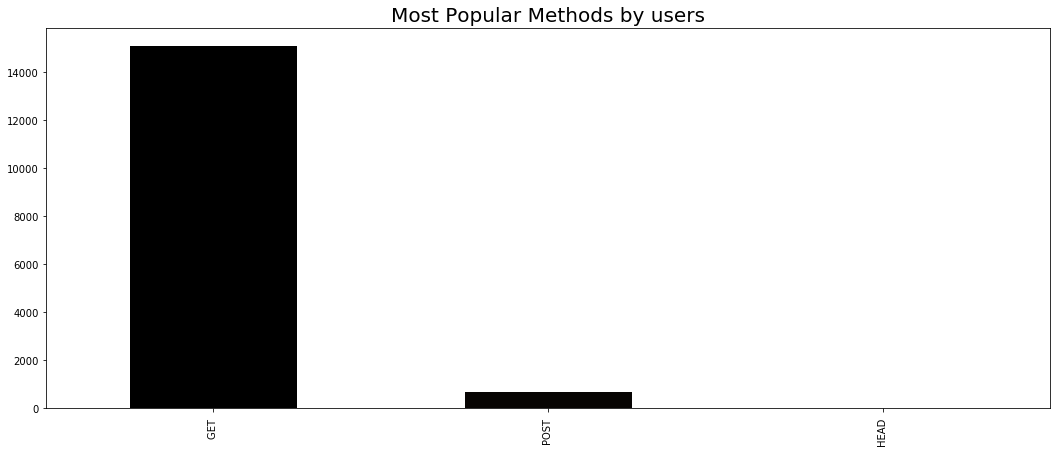

In [7]:
# Visualize status by ip address
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
df['method'].value_counts().plot.bar(color = color)
plt.title('Most Popular Methods by users', fontsize = 20)
plt.show()

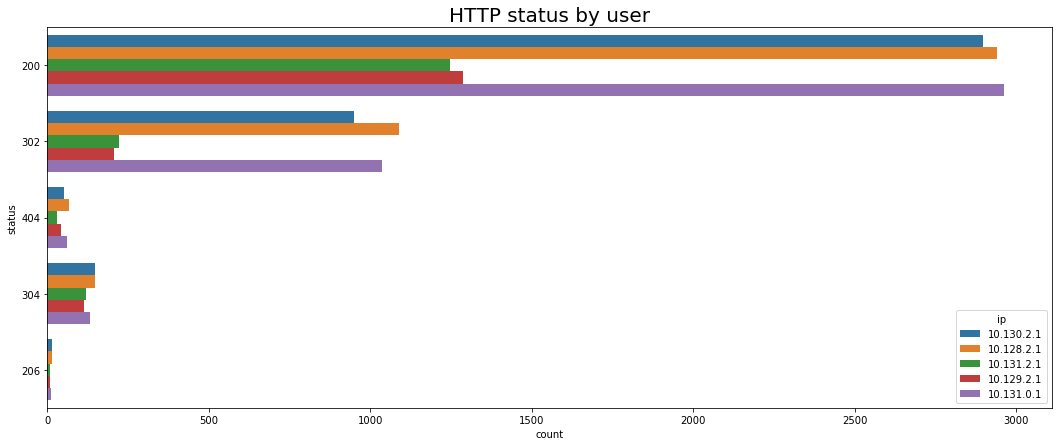

In [8]:
sns.countplot(y="status", hue="ip", data=df)
plt.title('HTTP status by user', fontsize = 20)
plt.show()

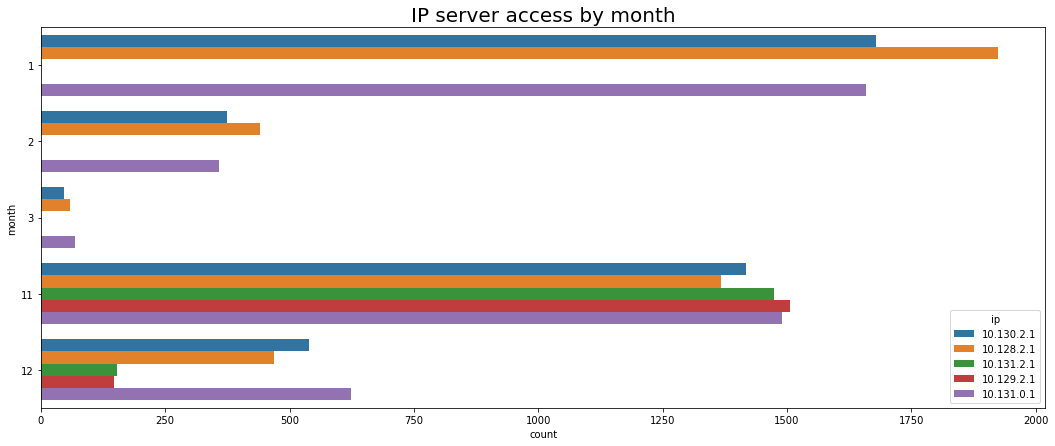

In [9]:
sns.countplot(y="month", hue="ip", data=df)
plt.title('IP server access by month', fontsize = 20)
plt.show()

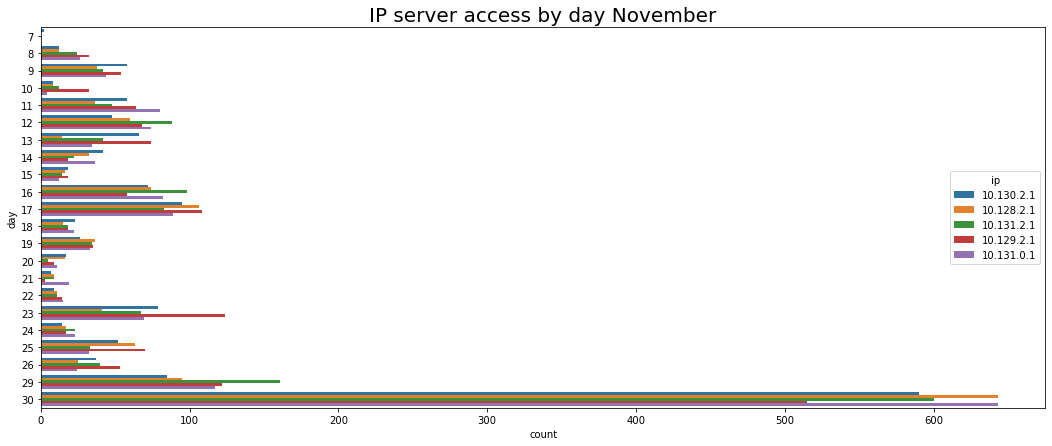

In [10]:
nov = df['month'] == 11
ndf = df[nov]
sns.countplot(y= 'day', hue="ip", data=ndf)
plt.title('IP server access by day November', fontsize = 20)
plt.show()

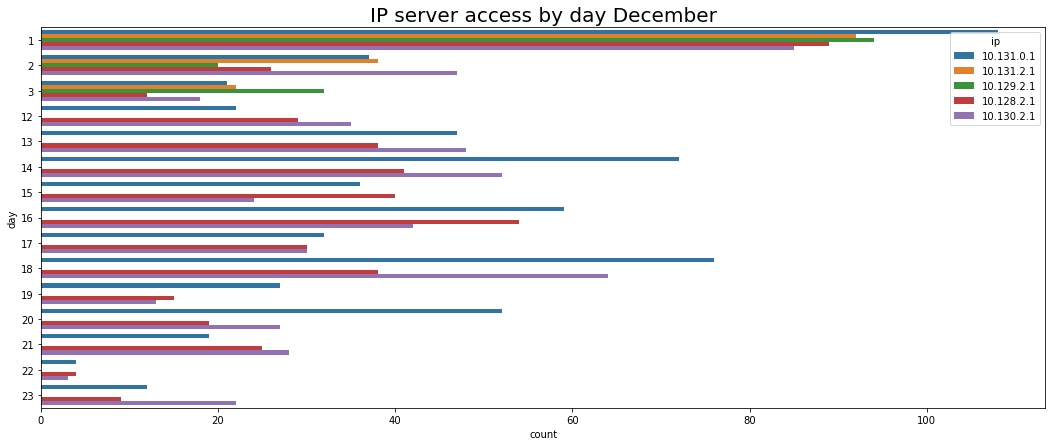

In [11]:
dec = df['month'] == 12
ddf = df[dec]
sns.countplot(y= 'day', hue="ip", data=ddf)
plt.title('IP server access by day December', fontsize = 20)
plt.show()

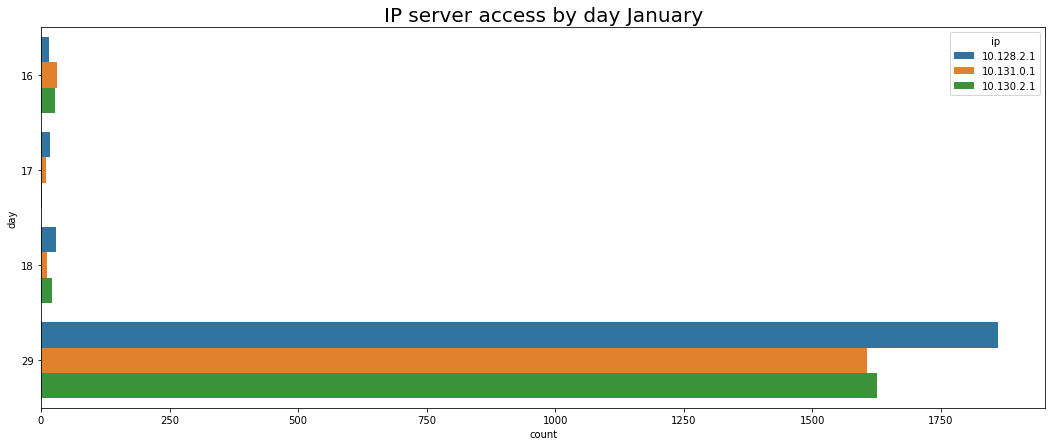

In [12]:
jan = df['month'] == 1
jdf = df[jan]
sns.countplot(y= 'day', hue="ip", data=jdf)
plt.title('IP server access by day January', fontsize = 20)
plt.show()

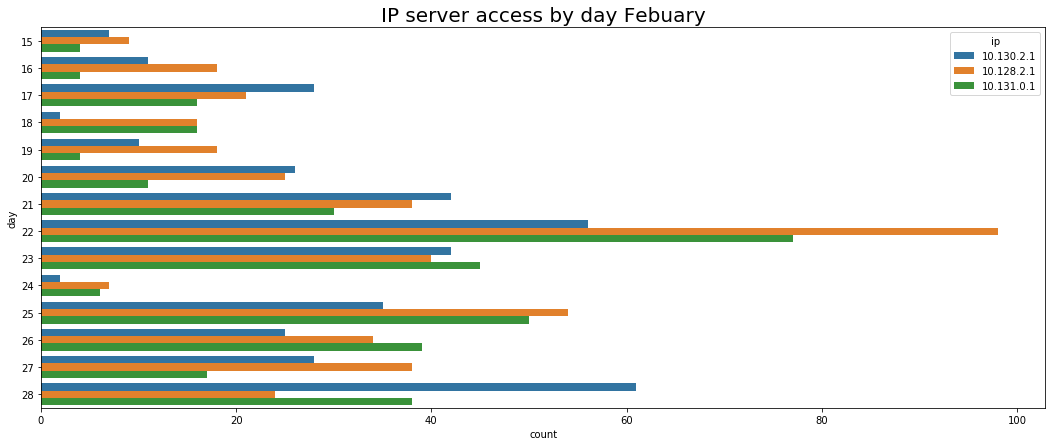

In [13]:
feb = df['month'] == 2
fdf = df[feb]
sns.countplot(y= 'day', hue="ip", data=fdf)
plt.title('IP server access by day Febuary', fontsize = 20)
plt.show()

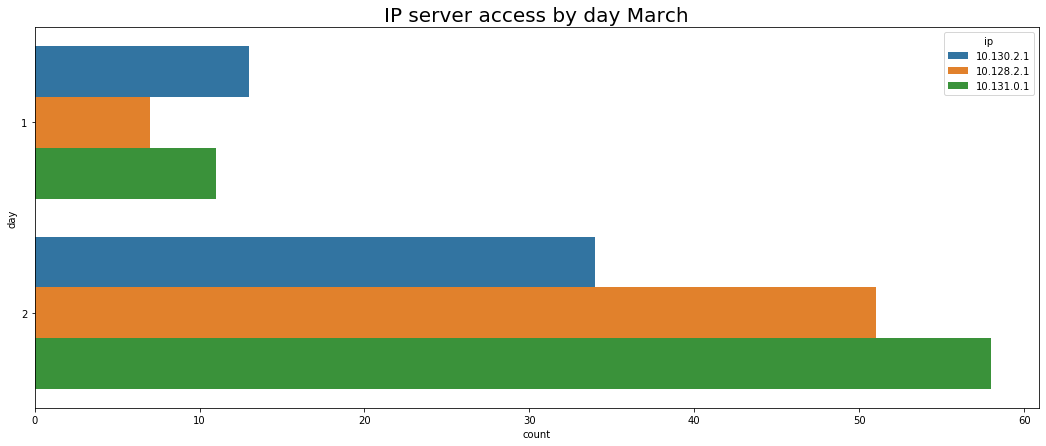

In [14]:
mar = df['month'] == 3
mdf = df[mar]
sns.countplot(y= 'day', hue="ip", data=mdf)
plt.title('IP server access by day March', fontsize = 20)
plt.show()

In [15]:
# Georges Project
# url = "https://en.wikipedia.org/wiki/List_of_people_who_died_in_traffic_collisions"
# tables = pd.read_html(url)
# df = pd.concat(tables)
# df.reset_index(drop = True)
# df